In [ ]:
!pip install mxnet-cu101mkl gluoncv d2l

In [ ]:
# LENET
from d2l import mxnet as d2l
from mxnet import autograd, gluon, init, np, npx
from mxnet.gluon import nn
npx.set_np()
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, padding=2, activation='sigmoid'),
        nn.AvgPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=5, activation='sigmoid'),
        nn.AvgPool2D(pool_size=2, strides=2),
        # `Dense` will transform an input of the shape (batch size, number of
        # channels, height, width) into an input of the shape (batch size,
        # number of channels * height * width) automatically by default
        nn.Dense(120, activation='sigmoid'),
        nn.Dense(84, activation='sigmoid'),
        nn.Dense(10))

In [ ]:
# modified version
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, padding=2, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Dropout(0.25),
        nn.Conv2D(channels=16, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Dropout(0.25),
        # `Dense` will transform an input of the shape (batch size, number of
        # channels, height, width) into an input of the shape (batch size,
        # number of channels * height * width) automatically by default
        nn.Dense(120, activation='relu'),
        nn.Dropout(0.5),
        nn.Dense(84, activation='relu'),
        nn.Dropout(0.5),
        nn.Dense(10))

In [ ]:
X = np.random.uniform(size=(1, 1, 28, 28))
net.initialize()
for layer in net:
  X = layer(X)
  print(layer.name, 'output shape:\t', X.shape)

conv10 output shape:	 (1, 6, 28, 28)
pool10 output shape:	 (1, 6, 14, 14)
dropout8 output shape:	 (1, 6, 14, 14)
conv11 output shape:	 (1, 16, 10, 10)
pool11 output shape:	 (1, 16, 5, 5)
dropout9 output shape:	 (1, 16, 5, 5)
dense15 output shape:	 (1, 120)
dropout10 output shape:	 (1, 120)
dense16 output shape:	 (1, 84)
dropout11 output shape:	 (1, 84)
dense17 output shape:	 (1, 10)


In [ ]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

loss 0.407, train acc 0.854, test acc 0.888
13414.4 examples/sec on gpu(0)


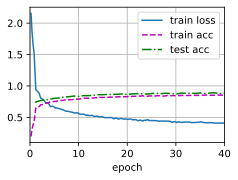

In [ ]:
# lr=0.9 only works with sigmoid, not with relu
# for relu a much smaller lr is needed.
lr, num_epochs = 0.1, 40
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)